# Задание
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?


Для студентов группы РТ5-61Б - для пары произвольных колонок данных построить график "Jointplot".


Примечания:

* Если в Вашем наборе данных отсутствуют данные, необходимые для решения задачи, создайте их искусственно. Например, если отсутствуют категориальные признаки, создайте категориальный признак на основе числового. Если отсутствуют пропуски, замените на пропуски часть значений в одном или нескольких признаках.
* Также Вы можете дополнительно использовать датасеты, содержащие необходимые данные, например использовать дополнительный датасет, содержащий пропуски.

In [5]:
def count_nan(data):
    for col in data.columns:
        count_nan = data[data[col].isnull()].shape[0]
        print('{} имеет NAN: {}'.format(col, count_nan))
count_nan(data)

Serial No. имеет NAN: 0
GRE Score имеет NAN: 0
TOEFL Score имеет NAN: 0
University Rating имеет NAN: 0
SOP имеет NAN: 0
LOR  имеет NAN: 0
CGPA имеет NAN: 0
Research имеет NAN: 0
Chance of Admit  имеет NAN: 0


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
# sns.set(style="ticks")

In [14]:
data = pd.read_csv('./Admission_Predict.csv', sep=',')
data.head(7)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75


In [15]:
print('количество строк {}, количество столбцов {}'.format(data.shape[0], data.shape[1]))

количество строк 400, количество столбцов 9


In [16]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [17]:
data['University Rating'].unique()

array([4, 3, 2, 5, 1])

In [18]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Пострим график joinplot  на основе средних баллов ученика (Undergraduate GPA) и его вероятности поступления (Chance of Admit)

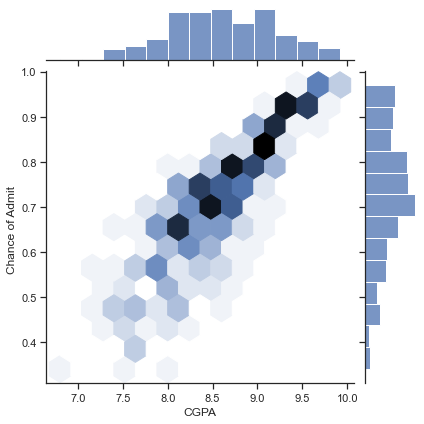

In [24]:
sns.jointplot(x = "CGPA", y = "Chance of Admit ",
              kind = "hex", data = data)
plt.show()

In [28]:
data.columns
    

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## Искусственно создадим пропуска для числовой колоке

In [51]:
import random
def count_nan(length, count):
    return (count / length) * 100

def create_nan(data, column):
    length = data.shape[0]
    while (count_nan(length, data[f'{column}'].isnull().sum()) < 5):
        index = random.randint(0, 399)
        data_column = data[f'{column}']
        data_column[index] = None

In [52]:
create_nan(data, 'LOR ')

In [53]:
data.isnull().sum() / data.count()

Serial No.           0.000000
GRE Score            0.000000
TOEFL Score          0.000000
University Rating    0.000000
SOP                  0.000000
LOR                  0.052632
CGPA                 0.000000
Research             0.000000
Chance of Admit      0.000000
dtype: float64

In [55]:
data.head(50)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,NaN,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [56]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,380.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.457895,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.901957,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


значения LOR находятся в интервале от 1 до 5.  среднее значение равно 3.5, поэтому заполню пропуска средним значением.

In [57]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [58]:
strateg=['mean', 'median', 'most_frequent']
def fill_nan(strategy_param, data):
    imputation = SimpleImputer(strategy=strategy_param)
    data_fill = imputation.fit_transform(data)
    return data_fill

In [62]:
result = fill_nan(strateg[0], data)

In [78]:
data_column = data['LOR ']
for i in range(0, 400):
    data_column[i] = result[i][5]
    

/tmp/ipykernel_6845/2912940084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_column[i] = result[i][5]


In [81]:
data.isnull().sum() / data.count()

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

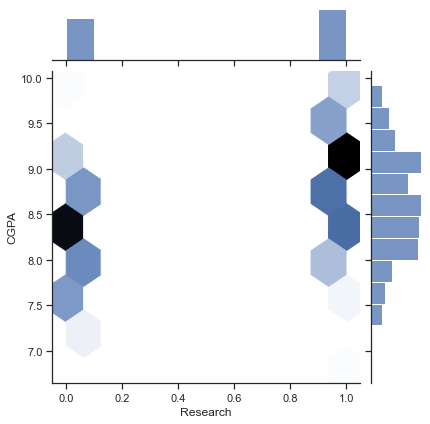

In [83]:
sns.jointplot(x = "Research", y = "CGPA",
              kind = "hex", data = data)
plt.show()

##  Искусственно создадим категориальный признак и создадим пропуски

In [ ]:
values = ['Yes', 'No']
for i in range(0, 400):
    column = data.Research
    if (column[i] == 1):
        column[i] = values[0]
    else:
        column[i] = values[1]
        

In [87]:
create_nan(data, 'Research')

In [88]:
data.isnull().sum() / data.count()

Serial No.           0.000000
GRE Score            0.000000
TOEFL Score          0.000000
University Rating    0.000000
SOP                  0.000000
LOR                  0.000000
CGPA                 0.000000
Research             0.052632
Chance of Admit      0.000000
dtype: float64

Основываясь на баллах бакалвриата можно предположить сделал ученик исследование или нет. На своем опыте могу сказать,что ученики с малым баллом не занимаются исследованиями. Поэтому если у ученика ср балл < 5, то он не занимался исследованием. 

In [93]:
ball = 5
column_res = data.Research
column_CGPA = data.CGPA
for i in range(0, 399):
    if (column_CGPA[i] <= 5 and column_res[i] == None):
        column_res[i] = 'No'
    else:
        column_res[i] = 'Yes'
        

In [94]:
data.isnull().sum() / data.count()

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64